In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)
covid_df.head(10)


,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704
84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,"Bullock, Alabama, US",...,3020,3025,3025,3025,3025,3025,3025,3025,3030,3030
84001013,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,"Butler, Alabama, US",...,6518,6538,6538,6538,6538,6538,6538,6538,6551,6551
84001015,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,"Calhoun, Alabama, US",...,41228,41338,41338,41338,41338,41338,41338,41338,41421,41421
84001017,US,USA,840,1017.0,Chambers,Alabama,US,32.913601,-85.390727,"Chambers, Alabama, US",...,10812,10846,10846,10846,10846,10846,10846,10846,10859,10859


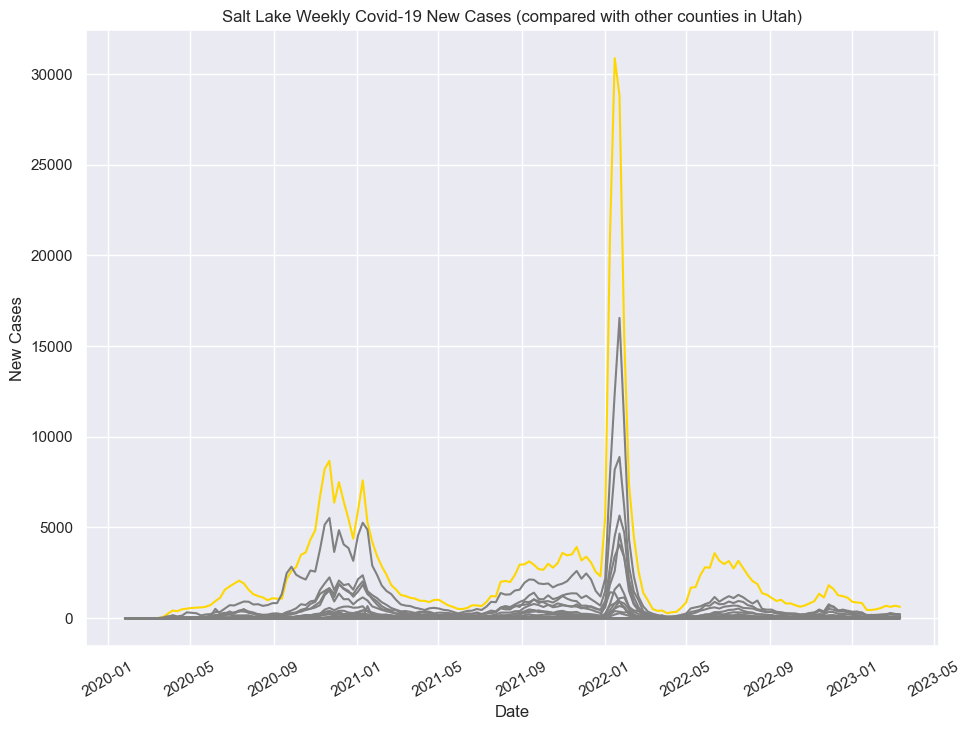

In [282]:
v_1 = covid_df[covid_df['Province_State'] == 'Utah']
c = v_1.columns.tolist()
useful_columns = [c[4]] + c[10:]
v_1 = v_1[useful_columns]
v_1 = v_1.set_index('Admin2')
v_1 = v_1[v_1.sum(axis=1)>0]
v_1 = v_1.T
v_1.index = pd.to_datetime(v_1.index,format = '%m/%d/%y')
v_1 = v_1.diff().fillna(0).astype(int)
v_1[v_1.values < 0] = 0
v_1 = v_1.groupby([pd.Grouper(freq='W')]).sum()
for county in v_1.columns:
    color = 'gold' if county == 'Salt Lake' else 'grey'
    plt.plot(v_1[county],color = color)
plt.title("Salt Lake Weekly Covid-19 New Cases (compared with other counties in Utah)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tick_params(axis='x', labelrotation=30)
plt.show()

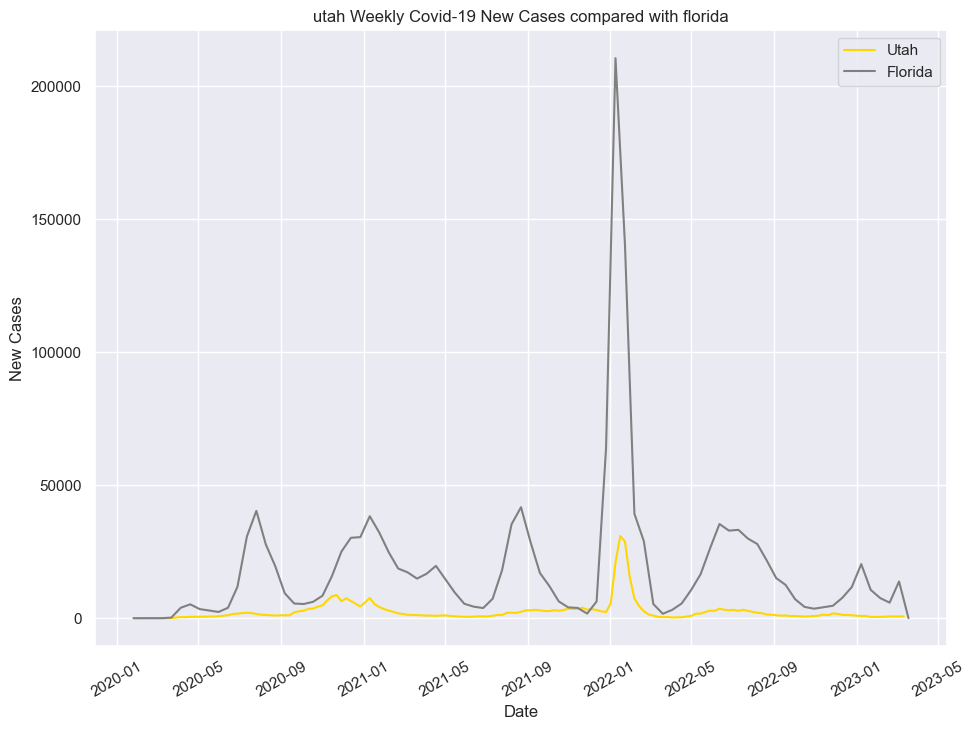

In [284]:
v_2_utah = covid_df[covid_df['Province_State'] == 'Utah']
c = v_2_utah.columns.tolist()
useful_columns = [c[4]] + c[10:]
v_2_utah = v_2_utah[useful_columns]
v_2_utah = v_2_utah.set_index('Admin2')
max_utah = v_2_utah.max(axis=1).idxmax()
v_2_utah = v_2_utah.loc[max_utah]
v_2_utah.index = pd.to_datetime(v_2_utah.index,format = '%m/%d/%y')
v_2_utah = v_2_utah.diff().fillna(0).astype(int)
v_2_utah[v_2_utah.values < 0] = 0
v_2_utah = v_2_utah.groupby([pd.Grouper(freq='1W')]).sum()
v_2_florida = covid_df[covid_df['Province_State'] == 'Florida']
c = v_2_florida.columns.tolist()
useful_columns = [c[4]] + c[10:]
v_2_florida = v_2_florida[useful_columns]
v_2_florida = v_2_florida.set_index('Admin2')
max_florida = v_2_florida.max(axis=1).idxmax()
v_2_florida = v_2_florida.loc[max_florida]
v_2_florida.index = pd.to_datetime(v_2_florida.index,format = '%m/%d/%y')
v_2_florida = v_2_florida.diff().fillna(0).astype(int)
v_2_florida[v_2_florida.values < 0] = 0
v_2_florida = v_2_florida.groupby([pd.Grouper(freq='2W')]).sum()
plt.plot(v_2_utah,label='Utah',color = 'gold')
plt.plot(v_2_florida,label='Florida',color = 'grey')
plt.title("utah Weekly Covid-19 New Cases compared with florida")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tick_params(axis='x', labelrotation=30)
plt.legend()
plt.show()

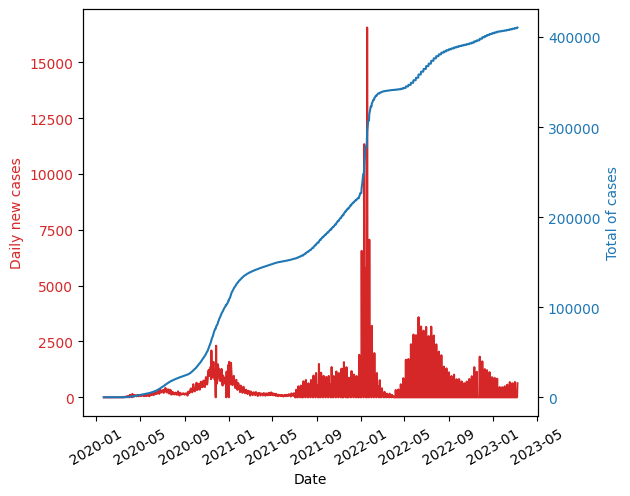

In [178]:
v_3_salt_lake = covid_df[(covid_df['Province_State'] == 'Utah') & (covid_df['Admin2'] == 'Salt Lake')]
c = v_3_salt_lake.columns.tolist()
useful_columns = [c[4]] + c[10:]
v_3_salt_lake = v_3_salt_lake[useful_columns]
v_3_salt_lake = v_3_salt_lake.set_index('Admin2')
v_3_salt_lake.columns = pd.to_datetime(v_3_salt_lake.columns,format = '%m/%d/%y')
v_3_salt_lake = v_3_salt_lake.T
v_3_salt_lake_new = v_3_salt_lake.diff().fillna(0).astype(int)
v_3_salt_lake_new[v_3_salt_lake_new.values < 0] = 0
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily new cases', color=color)
ax1.plot(v_3_salt_lake_new, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Total of cases', color=color)  # we already handled the x-label with ax1
ax2.plot(v_3_salt_lake, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.tick_params(axis='x', labelrotation=30)
plt.show()



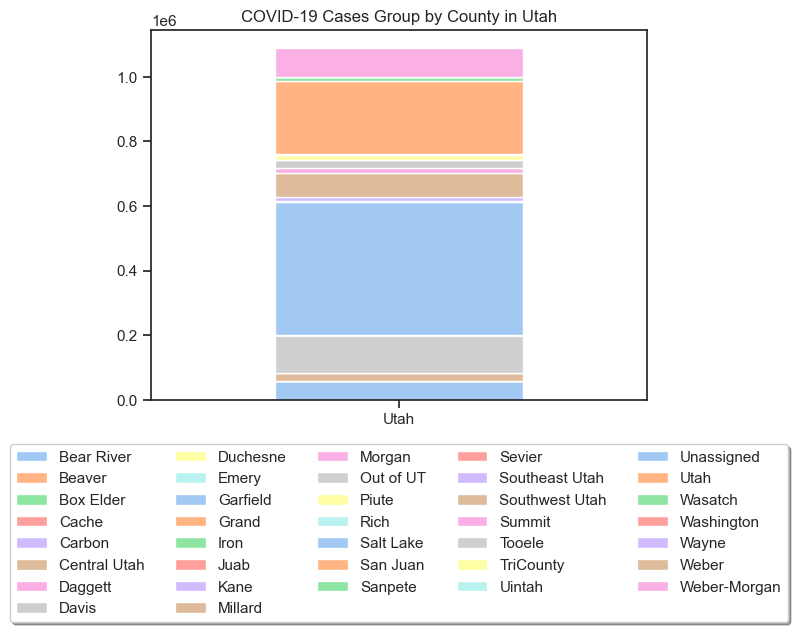

In [274]:
v_4_utah = covid_df[covid_df['Province_State'] == 'Utah']
c = v_4_utah.columns.tolist()
useful_columns = [c[4]] + c[10:]
v_4_utah = v_4_utah[useful_columns]
v_4_utah = v_4_utah.set_index('Admin2')
v_4_utah = v_4_utah.T
v_4_utah.index = pd.to_datetime(v_4_utah.index,format = '%m/%d/%y')
v_4_data = v_4_utah.max()
state = 'Utah'
fig, ax = plt.subplots()
bottom = 0
v_4_data.index
for index in v_4_data.index:
    p = ax.bar(state, v_4_data[index], label=index, bottom = bottom, width=0.5)
    bottom += v_4_data[index]
ax.set_title("COVID-19 Cases Group by County in Utah")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
ax.set_xlim(-0.5, 0.5)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'Texas'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'New York'),
  Text(4, 0, 'Illinois'),
  Text(5, 0, 'Pennsylvania'),
  Text(6, 0, 'North Carolina'),
  Text(7, 0, 'Ohio'),
  Text(8, 0, 'Georgia'),
  Text(9, 0, 'Michigan'),
  Text(10, 0, 'New Jersey'),
  Text(11, 0, 'Tennessee'),
  Text(12, 0, 'Arizona'),
  Text(13, 0, 'Virginia'),
  Text(14, 0, 'Massachusetts'),
  Text(15, 0, 'Indiana'),
  Text(16, 0, 'Wisconsin'),
  Text(17, 0, 'Washington'),
  Text(18, 0, 'Missouri'),
  Text(19, 0, 'South Carolina'),
  Text(20, 0, 'Minnesota'),
  Text(21, 0, 'Colorado'),
  Text(22, 0, 'Kentucky'),
  Text(23, 0, 'Alabama'),
  Text(24, 0, 'Louisiana'),
  Text(25, 0, 'Oklahoma'),
  Text(26, 0, 'Maryland

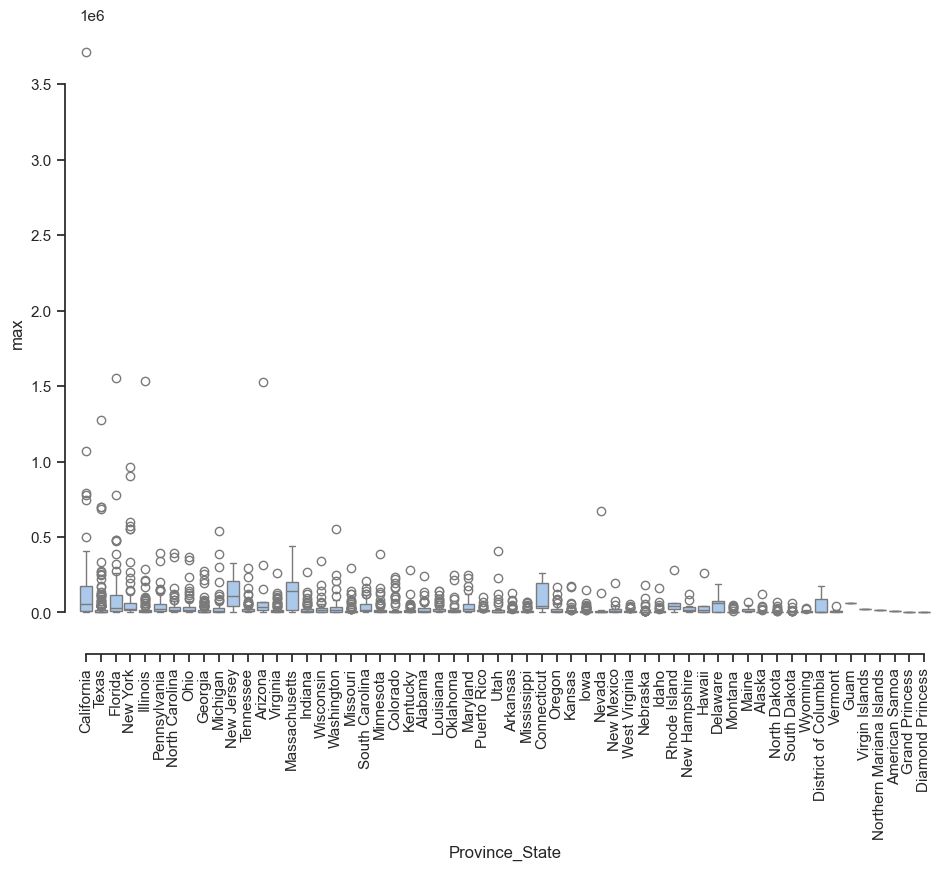

In [281]:
c = covid_df.columns.tolist()
useful_columns = [c[5]] + c[10:]
v_5 = covid_df[useful_columns].copy()
v_5_columns = v_5.columns.tolist()[1:]
v_5_max = v_5[v_5_columns].max(axis=1)
v_5['max'] = v_5_max
v_5_group = v_5.groupby('Province_State').sum('max')
v_5_list= v_5_group.sort_values(by = ['max'], ascending=False)
v_5_index = v_5_list.index
v_5 = v_5[['Province_State','max']]
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=v_5['Province_State'], y=v_5['max'],order=v_5_index)
sns.set(rc={'figure.figsize':(11,8)})
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)